<a href="https://colab.research.google.com/github/TranHaoDong/BT_AI_WEEK9-15/blob/main/Week11/VND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

# Load data
photos = np.load('/content/drive/MyDrive/Colab Notebooks/DATA/money_photos.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/DATA/money_labels.npy')

# Preprocess data
photos = photos.astype('float32') / 255.0
labels = to_categorical(labels)

# Split data into train and test sets
split_index = int(0.1 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

# Define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3), padding = 'same'))
model.add(MaxPooling2D((2, 2), padding ='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), padding ='same'))
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2), padding ='same'))
model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(Conv2D(256, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Flatten())
model.add(Dropout(0.8))
model.add(Dense(512, activation='relu'))
model.add(Dense(8, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train model
train = model.fit(train_x, train_y, batch_size= 64, epochs= 40, verbose= 1)


Epoch 1/40
6/6 [==============================] - 10s 1s/step - loss: 1.9694 - accuracy: 0.2143
Epoch 2/40
6/6 [==============================] - 10s 1s/step - loss: 1.8880 - accuracy: 0.2202
Epoch 3/40
6/6 [==============================] - 10s 2s/step - loss: 1.8316 - accuracy: 0.2411
Epoch 4/40
6/6 [==============================] - 9s 1s/step - loss: 1.7498 - accuracy: 0.3036
Epoch 5/40
6/6 [==============================] - 9s 1s/step - loss: 1.5709 - accuracy: 0.4048
Epoch 6/40
6/6 [==============================] - 10s 2s/step - loss: 1.4761 - accuracy: 0.4107
Epoch 7/40
6/6 [==============================] - 10s 2s/step - loss: 1.3493 - accuracy: 0.4911
Epoch 8/40
6/6 [==============================] - 8s 1s/step - loss: 1.1551 - accuracy: 0.5714
Epoch 9/40
6/6 [==============================] - 9s 2s/step - loss: 1.2469 - accuracy: 0.5327
Epoch 10/40
6/6 [==============================] - 10s 2s/step - loss: 0.9589 - accuracy: 0.6220
Epoch 11/40
6/6 [==========================

In [68]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

2/2 [==============================] - 1s 71ms/step - loss: 3.0147 - accuracy: 0.5676
Test accuracy: 0.5675675868988037


1/1 [==============================] - 0s 27ms/step
4
50K


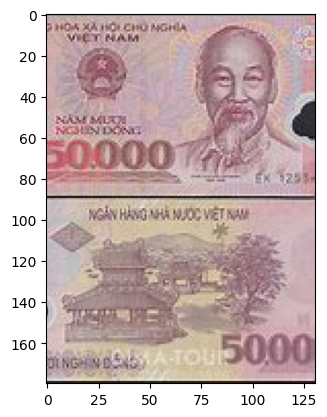

1/1 [==============================] - 0s 30ms/step
2
10K


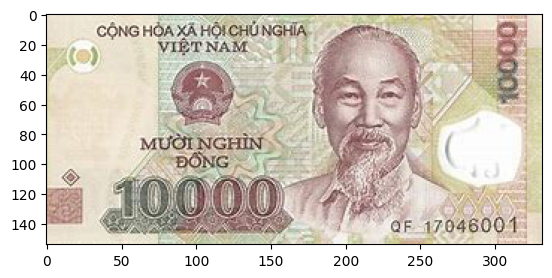

1/1 [==============================] - 0s 34ms/step
1
5K


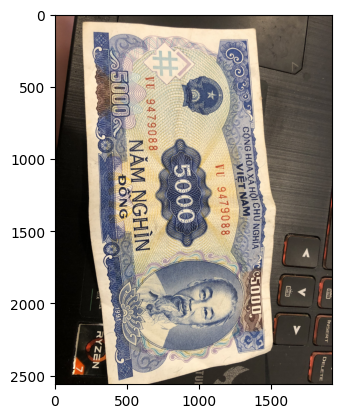

1/1 [==============================] - 0s 33ms/step
6
200K


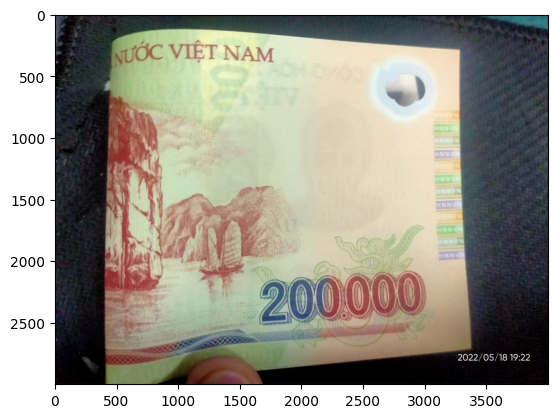

1/1 [==============================] - 0s 28ms/step
3
20K


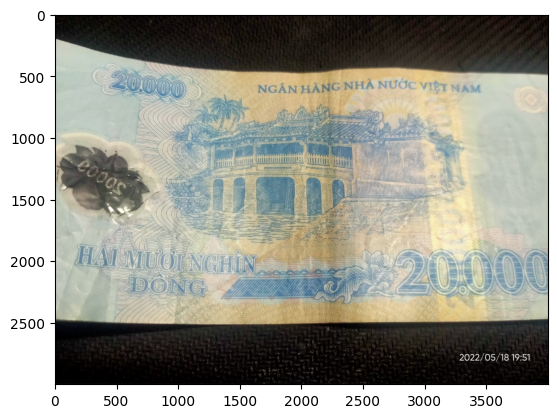

1/1 [==============================] - 0s 33ms/step
5
100K


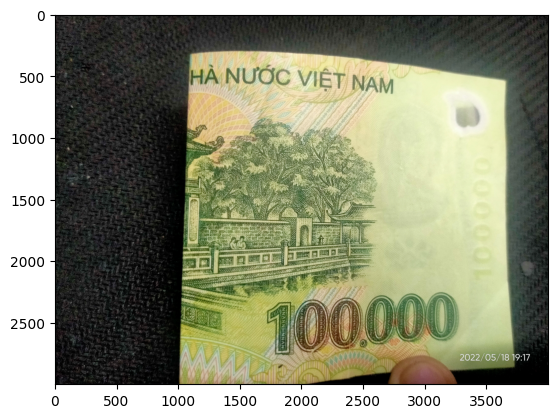

1/1 [==============================] - 0s 47ms/step
7
500K


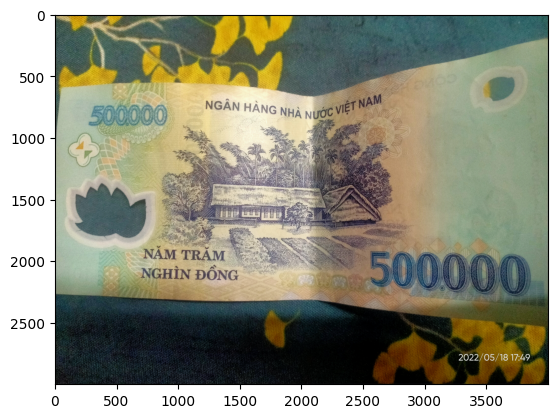

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/Test_money/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (100, 100))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  print(result)
  class_name=['', '5K', '10K', '20K', '50K', '100K', '200K', '500K']
  print(class_name[result])
  plt.show()